## Q1

In [4]:
import math

def misclassification_impurity(blue, red):
    total = blue + red
    return min(blue, red) / total

def gini_impurity(blue, red):
    total = blue + red
    p_blue = blue / total
    p_red = red / total
    return 1 - (p_blue**2 + p_red**2)

def entropy_impurity(blue, red):
    total = blue + red
    p_blue = blue / total
    p_red = red / total
    result = -(p_blue * math.log2(p_blue) + p_red * math.log2(p_red))
    return result

blue1 = 3
red1 = 2
print(f"Misclassification Impurity: {misclassification_impurity(blue1, red1):.4f}")
print(f"Gini Impurity: {gini_impurity(blue1, red1):.4f}") 
print(f"Entropy Impurity: {entropy_impurity(blue1, red1):.4f}")

blue2 = 2
red2 = 3
print(f"\nMisclassification Impurity: {misclassification_impurity(blue2, red2):.4f}")
print(f"Gini Impurity: {gini_impurity(blue2, red2):.4f}")
print(f"Entropy Impurity: {entropy_impurity(blue2, red2):.4f}")

Misclassification Impurity: 0.4000
Gini Impurity: 0.4800
Entropy Impurity: 0.9710

Misclassification Impurity: 0.4000
Gini Impurity: 0.4800
Entropy Impurity: 0.9710


## Q2

## Q3

In [6]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# create regression problem
n_points = 1000 # points
x, y = make_friedman1 ( n_samples =n_points, n_features =10, noise = 5, random_state =100)

# split to train /test set
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size =0.33, random_state =100)

# construct bagging regressor model
n_estimators = 100
bagging_regressor = BaggingRegressor(n_estimators=n_estimators, random_state=100)

# define different m
m_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# use different m values to train model and record R^2 scores
r2_scores = []
for m in m_values:
    bagging_regressor.max_features = m
    bagging_regressor.fit(x_train, y_train)
    y_pred = bagging_regressor.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

for m, r2 in zip(m_values, r2_scores):
    print(f"Max Features = {m}: R2 Score = {r2}")


Max Features = 1: R2 Score = 0.05177534791291338
Max Features = 2: R2 Score = 0.1761023808358908
Max Features = 3: R2 Score = 0.25500141659873443
Max Features = 4: R2 Score = 0.30708092564399536
Max Features = 5: R2 Score = 0.331656115538117
Max Features = 6: R2 Score = 0.36800946335166207
Max Features = 7: R2 Score = 0.40353749399244565
Max Features = 8: R2 Score = 0.41113876999786503
Max Features = 9: R2 Score = 0.40047144069940244
Max Features = 10: R2 Score = 0.40052938944990013


## Q4

In [21]:
from sklearn.datasets import make_blobs
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

if __name__ == "__main__":
    x, y = make_blobs(n_samples=1000, n_features=20, centers=2,
                      random_state=100, cluster_std=6)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
    
    gammas = [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    losses = []
    for gamma in gammas:
        bclf = GradientBoostingClassifier(n_estimators=80, learning_rate=gamma, random_state=100)
        bclf.fit(x_train, y_train)
        y_pred = bclf.predict(x_test)
        loss = zero_one_loss(y_test, y_pred)
        losses.append(loss)
    
    best_gamma = gammas[losses.index(min(losses))]
    best_loss = min(losses)
    
    print("Best Gamma Value:", best_gamma)
    print("Zero-One Loss with Best Gamma:", best_loss)


Best Gamma Value: 0.1
Zero-One Loss with Best Gamma: 0.00303030303030305


## Q5

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Hitters.csv')
# print(data.head())
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print(data.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    315    81      7    24   38     39     14    3449    835      69    321   
1    479   130     18    66   72     76      3    1624    457      63    224   
2    496   141     20    65   78     37     11    5628   1575     225    828   
3    321    87     10    39   42     30      2     396    101      12     48   
4    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  League  Division  PutOuts  Assists  Errors  Salary  NewLeague  
0   414     375       1         1      632       43      10   475.0          1  
1   266     263       0         1      880       82      14   480.0          0  
2   838     354       1         0      200       11       3   500.0          1  
3    46      33       1         0      805       40       4    91.5          1  
4   336     194       0         1      282      421      25   750.0          0  


使用虚拟变量会极大增加特征空间的维度,尤其是类别值很多的情况下,可能会导致维数灾难。对于有序的类别特征,使用虚拟变量会失去有序信息。相比之下,LabelEncoder的做法是将每个不同的类别值映射到一个不同的数值上。在这个数据集中，categorical类别的数据并不复杂，所以使用LabelEncoder计算简单,不会增加特征空间维度。因此,在这个问题中使用 LabelEncoder 作为一个基线做法是合理的,因为它简单高效。
Using one-hot encoding can greatly increase the dimensionality of the feature space, especially when there are many categorical values, which may lead to the curse of dimensionality. For ordered categorical features, using one-hot encoding would lose the ordinal information. In contrast, LabelEncoder's approach is to map each different categorical value to a different numerical value. In this dataset, the categorical data is not complex, so using LabelEncoder is simple and does not increase the dimensionality of the feature space. Therefore, in this problem, it is reasonable to use LabelEncoder as a baseline approach because it is simple and efficient.

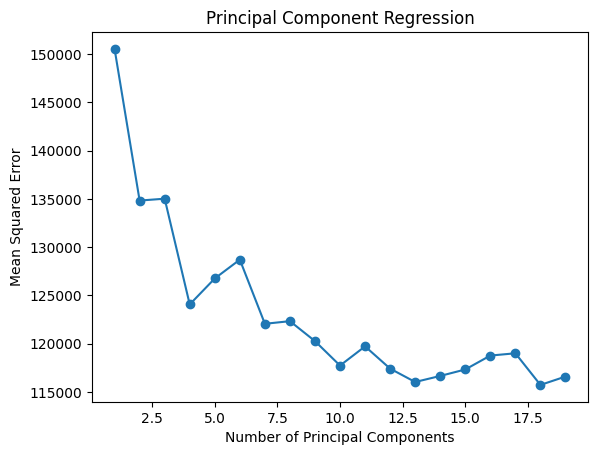

Optimal number of principal components: 18


In [43]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

X = data.drop('Salary', axis=1)
y = data['Salary']

n_components = np.arange(1, X.shape[1]+1)

mse = []
for n in n_components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    lr = LinearRegression()
    scores = (-1 * cross_val_score(lr, X_pca, y, cv=10, scoring='neg_mean_squared_error')).mean()
    mse.append(scores)

plt.plot(n_components, mse, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.title('Principal Component Regression')
plt.show()

# 找到最优主成分数量
opt_n_components = n_components[np.argmin(mse)]
print(f'Optimal number of principal components: {opt_n_components}')

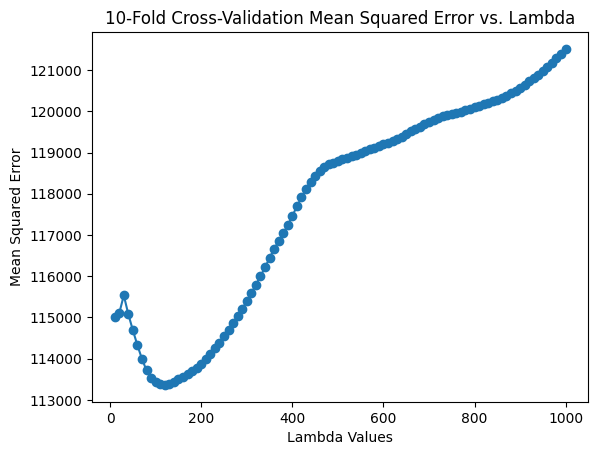

Best Lambda: 120
Corresponding Mean Squared Error: 113361.94323846386


In [44]:
from sklearn.linear_model import Lasso

X = data.drop('Salary', axis=1)
y = data['Salary']

lambda_values = np.arange(10, 1001, 10)

mse = []

for val in lambda_values:
    lasso = Lasso(alpha=val, max_iter=10000)
    score = -cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
best_lambda = lambda_values[np.argmin(mse)]
best_mse = np.min(mse)

plt.plot(lambda_values, mse, marker='o')
plt.xlabel('Lambda Values')
plt.ylabel('Mean Squared Error')
plt.title('10-Fold Cross-Validation Mean Squared Error vs. Lambda')
plt.show()

print(f"Best Lambda: {best_lambda}")
print(f"Corresponding Mean Squared Error: {best_mse}")

## Q6

In [42]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv('ships.csv')
formula = 'damage ~ 0 + type + construction + operation + months'
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson()).fit()
print(model.summary())

print("Coefficients:")
print(model.params, '\n')
print("95% Confidence Intervals:")
CI = model.conf_int(alpha=0.05)
CI.columns = ['Lower 95% CI', 'Upper 95% CI']
print(CI)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 damage   No. Observations:                   34
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -145.96
Date:                Wed, 03 Apr 2024   Deviance:                       194.06
Time:                        12:03:40   Pearson chi2:                     178.
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
type            -0.2237      0.048     -4.693   

In [35]:
nb = 1000
coefficients = []
for _ in range(nb):
    sample = data.sample(n=len(data), replace=True)
    model = sm.GLM.from_formula(formula, data=sample, family=sm.families.Poisson()).fit()
    coes = model.params
    coefficients.append(coes)
coefficients = np.array(coefficients)

se = coefficients.std(axis=0)
lower = np.percentile(coefficients, 2.5, axis=0)  
upper = np.percentile(coefficients, 97.5, axis=0)  
result = pd.DataFrame({'Standard Error': se, 'Lower 95% CI': lower, 'Upper 95% CI': upper}, index=model.params.index)
print(result)

              Standard Error  Lower 95% CI  Upper 95% CI
type                0.132578     -0.507211      0.028132
construction        0.160462      0.123484      0.753627
operation           0.384088     -0.263978      1.261690
months              0.000031      0.000067      0.000186


These two methods produce different confidence intervals (CIs) because:
(a) is based on the statistical analysis method using the original data. It assumes that the sample data is representative of the entire population.
(b) the bootstrap method is a technique that estimates the statistics by repeatedly resampling from the original dataset. Therefore, this leads to different CIs produced by the two methods.

## Q7

In [47]:
import pandas as pd
import statsmodels.formula.api as smf

data = pd.read_csv('softdrink.csv')
formula = 'Time ~ Cases + Distance'
model = smf.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           4.69e-16
Time:                        12:21:18   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3412      1.097      2.135      0.0

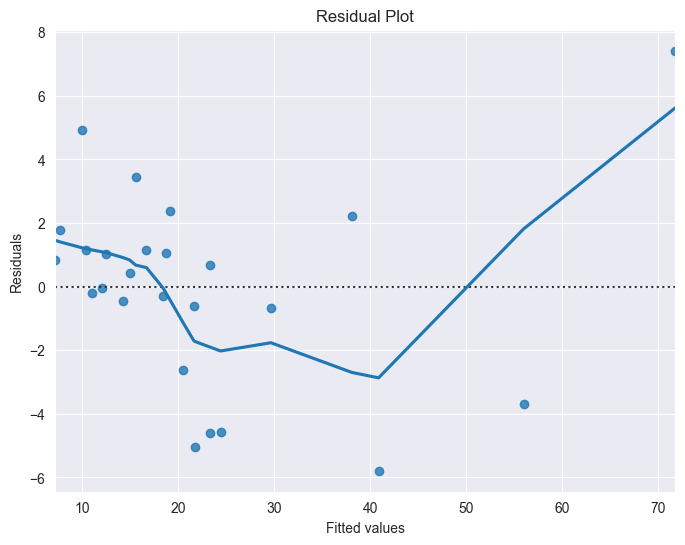

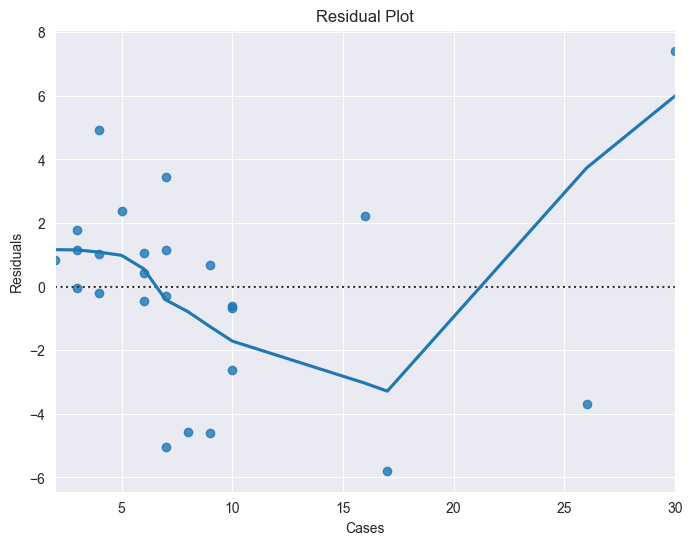

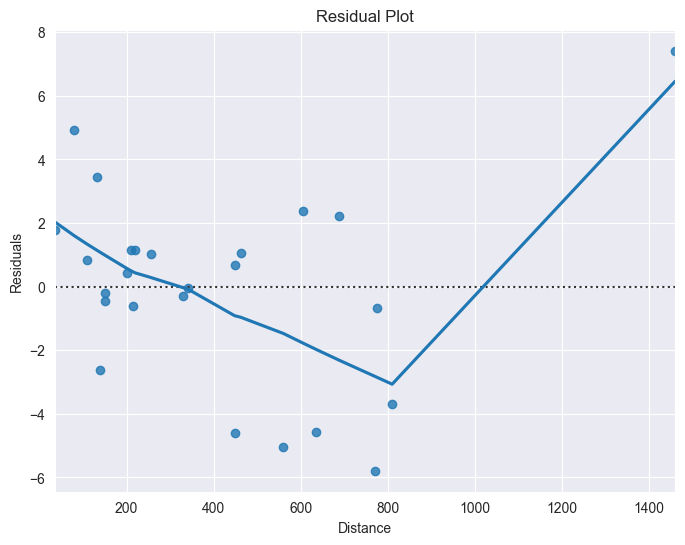

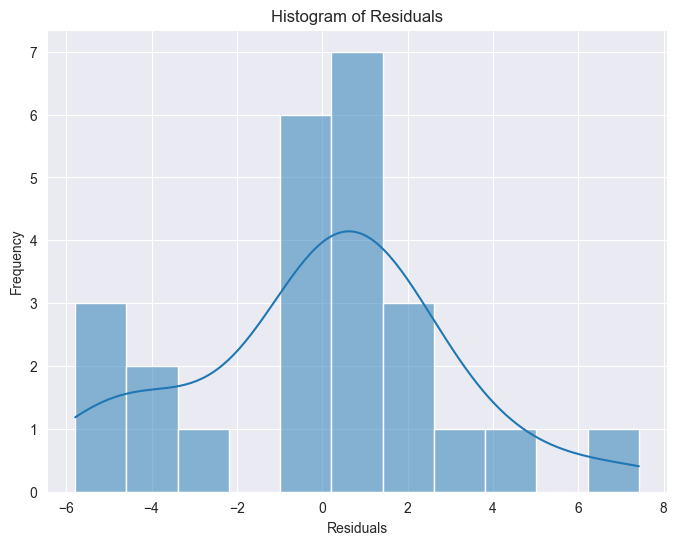

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(8, 6))
sns.residplot(x=data['Cases'], y=residuals, lowess=True)
plt.xlabel('Cases')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(8, 6))
sns.residplot(x=data['Distance'], y=residuals, lowess=True)
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Residual Plots:
The residual plot shows the relationship between the residuals and the fitted values. By using a lowess (locally weighted scatterplot smoothing) curve, we can observe the overall trend of the residuals.
Generally, the scatter plot of residuals should be randomly distributed above and below the horizontal line, with no apparent patterns or trends.

Residual Histogram:
The residual histogram displays the distribution of the residuals, including their frequencies and possible distribution shapes. A normal distribution of residuals would appear as a bell-shaped curve, with no significant skewness or outliers.
If the residual histogram exhibits significant skewness or a non-normal shape, further examination of the model assumptions or data characteristics may be necessary.

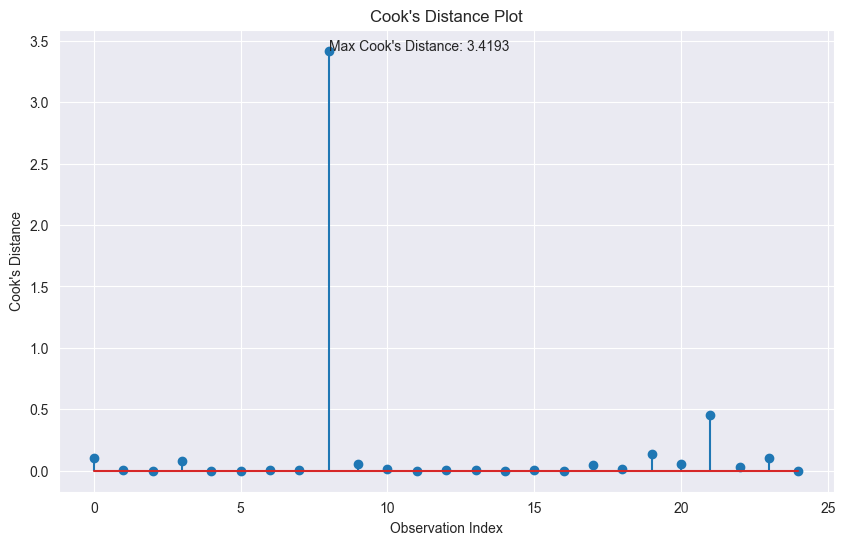

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(model)
cooks_distance = influence.cooks_distance[0]

max_cooks_index = np.argmax(cooks_distance)
max_cooks_value = cooks_distance[max_cooks_index]

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.annotate(f'Max Cook\'s Distance: {max_cooks_value:.4f}', xy=(max_cooks_index, max_cooks_value))
plt.show()

By the graph, can easily observe the index of the most influential point is 8 followed by 21